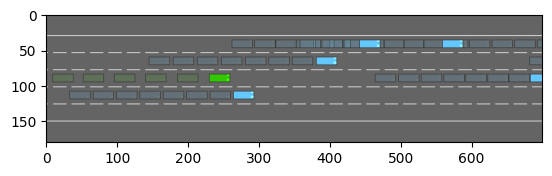

AttributeError: 'NoneType' object has no attribute 'get_image'

In [ ]:
import gymnasium
import highway_env
from stable_baselines3 import DQN
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


from config.config_sb import config_dict



gammas = [ i * 0.1 - 0.01 for i in range(1, 10)]
models = [DQN.load(f"highway_dqn/model_gamma_{gamma:.2f}") for gamma in gammas]

envs = [gymnasium.make("highway-fast-v0", render_mode="rgb_array") for _ in range(10)]
for env_instance in envs:
    env_instance.unwrapped.configure(config_dict)
    env_instance.reset(seed=42)  # Ensuring the same initial conditions by setting a fixed seed

for model, env in zip(models, envs):
    done = truncated = False
    obs, info = env.reset()
    episode_reward = 0
    
    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
        env.render()
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()
